In [1]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.0
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.1
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [3]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
for gpu in gpus:
  print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [6]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=tr

In [7]:
ds = tfds.load('fashion_mnist', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete2ICXTB/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete2ICXTB/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [9]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [10]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [11]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [12]:
ds.as_numpy_iterator().next()['label']

2

### Visualize Data and Build Dataset

In [13]:
# for some data transformation
import numpy as np

In [14]:
dataiterator = ds.as_numpy_iterator()

In [15]:
# getting data out of the pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

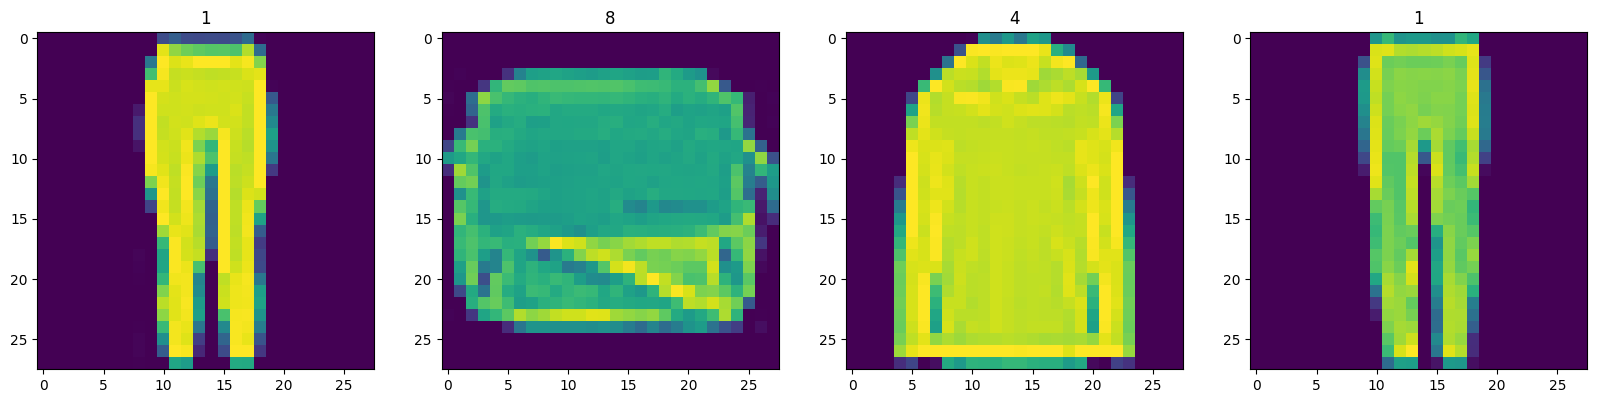

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  sample = dataiterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])

In [17]:
ax

array([<Axes: title={'center': '1'}>, <Axes: title={'center': '8'}>,
       <Axes: title={'center': '4'}>, <Axes: title={'center': '1'}>],
      dtype=object)

In [18]:
dataiterator.next()['image'].shape

(28, 28, 1)

In [19]:
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

In [20]:
# Scaling image
def scale_images(data):
  image = data['image']
  return image / 255

In [21]:
# Reload dataset
ds = tfds.load('fashion_mnist', split = 'train')
# Running te dataset the sacle_images preprocessing step
ds = ds.map(scale_images)
# cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likehood of bottlennecking
ds = ds.prefetch(64)

In [22]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

### Build the Neural Networks

In [23]:
# Import modelling components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [24]:
# Build Generator
def build_generator1():
  model = Sequential()

  # takes in random values and rehsapes it to 7x7x128
  # Beginning of a generated image
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))




  return model

In [25]:
test_model1 = build_generator1()

In [26]:
test_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
Total params: 809,088
Trainable params: 809,088
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Build Generator
def build_generator2():
  model = Sequential()

  # takes in random values and rehsapes it to 7x7x128
  # Beginning of a generated image
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  # Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))



  return model

In [28]:
test_model2 = build_generator2()

In [29]:
test_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [30]:
# Build Generator
def build_generator3():
  model = Sequential()

  # takes in random values and rehsapes it to 7x7x128
  # Beginning of a generated image
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  # Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))


  return model

In [31]:
test_model3 = build_generator3()

In [32]:
test_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_1 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [33]:
# Build Generator
def build_generator4():
  model = Sequential()

  # takes in random values and rehsapes it to 7x7x128
  # Beginning of a generated image
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  # Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(1, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))


  return model

In [34]:
test_model4 = build_generator4()

In [35]:
test_model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [36]:
# Build Generator
def build_generator5():
  model = Sequential()

  # takes in random values and rehsapes it to 7x7x128
  # Beginning of a generated image
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  # Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # Downsampling block 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Downsampling block 2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))


  return model

In [37]:
test_model5 = build_generator5()

In [38]:
test_model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_5 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [39]:
# Build Generator
def build_generator6():
  model = Sequential()

  # takes in random values and rehsapes it to 7x7x128
  # Beginning of a generated image
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  # Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get to one channel
  model.add(Conv2D(1, 4, padding = 'same', activation = 'sigmoid'))

  return model

In [40]:
test_model6 = build_generator6()

In [41]:
test_model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_7 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [42]:
generator = build_generator6()

In [43]:
generator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_6 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_9 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [44]:
img = generator.predict(np.random.randn(4, 128, 1))
img

1/1 [==============================] - 7s 7s/step


array([[[[0.49254495],
         [0.50275433],
         [0.49617755],
         ...,
         [0.50216746],
         [0.49775162],
         [0.50189036]],

        [[0.4897744 ],
         [0.49880895],
         [0.49771446],
         ...,
         [0.5007375 ],
         [0.49962157],
         [0.50637877]],

        [[0.48709783],
         [0.49124312],
         [0.49307388],
         ...,
         [0.4944448 ],
         [0.49846727],
         [0.50439113]],

        ...,

        [[0.49009722],
         [0.49160138],
         [0.49828085],
         ...,
         [0.49919134],
         [0.49843433],
         [0.50206983]],

        [[0.4927729 ],
         [0.49377736],
         [0.50205773],
         ...,
         [0.49558285],
         [0.500083  ],
         [0.5010776 ]],

        [[0.49802983],
         [0.5020713 ],
         [0.5015792 ],
         ...,
         [0.49564916],
         [0.49781954],
         [0.5013898 ]]],


       [[[0.5010626 ],
         [0.5018081 ],
         [0.50

In [45]:
img.shape

(4, 28, 28, 1)

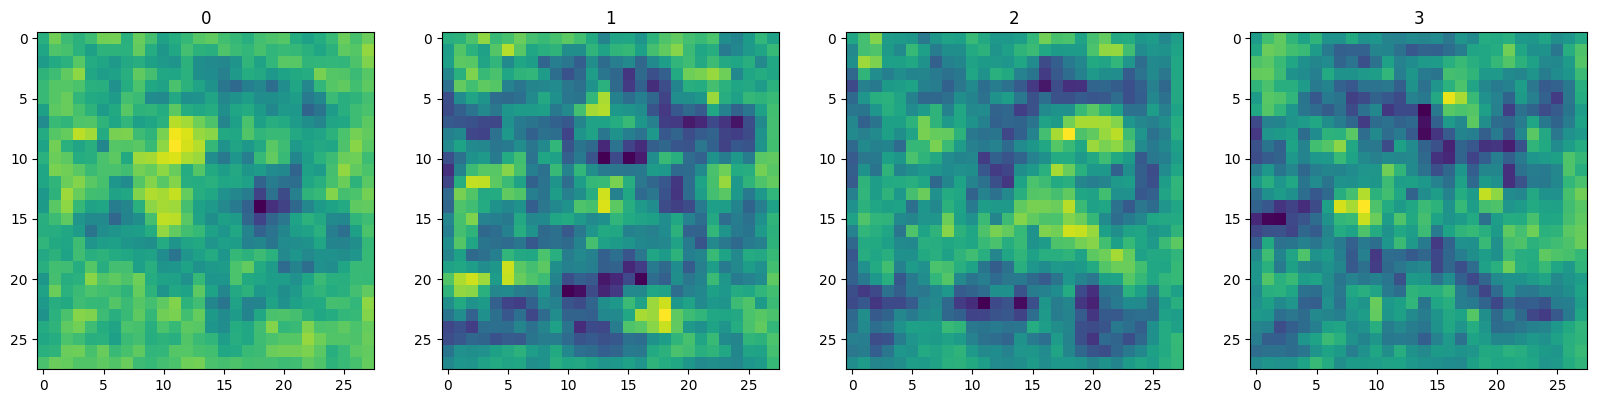

In [46]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

In [47]:
# Build Discriminator
def build_discriminator1():
  model = Sequential()

  # First Conv Block
  model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


  return model

In [48]:
discriminator1 = build_discriminator1()

In [49]:
discriminator1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [50]:
def build_discriminator2():
  model = Sequential()

  # First Conv Block
  model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv Block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv Block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  return model

In [51]:
discriminator2 = build_discriminator2()

In [52]:
discriminator2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 128)      

In [53]:
def build_discriminator3():
  model = Sequential()

  # First Conv Block
  model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv Block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv Block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fourth Conv Block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  return model

In [54]:
discriminator3 = build_discriminator3()

In [55]:
discriminator3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_5 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 128)      

In [56]:
from keras.api._v2.keras import activations
def build_discriminator4():
  model = Sequential()

  # First Conv Block
  model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv Block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv Block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fourth Conv Block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation = 'sigmoid'))

  return model

In [57]:
discriminator = build_discriminator4()

In [58]:
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_9 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 128)     

In [59]:
img = img[0]
img.shape

(28, 1)

In [62]:
discriminator.predict(img)

ValueError: ignored

In [63]:
# solution 1
img_test = np.expand_dims(img,0)
img_test.shape

(1, 28, 1)

In [64]:
discriminator.predict(np.expand_dims(img,0))

ValueError: ignored

In [65]:
# solution 2
img = generator.predict(np.random.randn(4, 128, 1))
discriminator.predict(img)

1/1 [==============================] - 0s 241ms/step


array([[0.49110305],
       [0.49112135],
       [0.49100015],
       [0.4911026 ]], dtype=float32)

### Construct Training Loop

In [66]:
# Setup Losses and Optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [67]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [68]:
# Build Subclassed Model

# Importing the base model class to subclass out training step
from tensorflow.keras.models import Model

In [69]:
tf.random.normal((6, 128, 1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[-1.56010807e-01],
        [ 1.05932809e-01],
        [ 1.17211588e-01],
        [-1.77069440e-01],
        [ 7.49637187e-02],
        [ 3.49521786e-01],
        [ 8.39094639e-01],
        [-1.72883615e-01],
        [ 2.26699185e+00],
        [ 6.79272115e-02],
        [-2.83012605e+00],
        [-2.57082057e+00],
        [ 1.45838654e+00],
        [ 9.01566803e-01],
        [ 1.81380630e+00],
        [ 1.33785641e+00],
        [-5.37582077e-02],
        [-1.57532513e-01],
        [-2.20067525e+00],
        [ 1.43407416e+00],
        [-1.70819238e-01],
        [-1.66828036e+00],
        [-2.74987906e-01],
        [-8.00915778e-01],
        [-8.33047852e-02],
        [-2.45165884e-01],
        [-9.35992241e-01],
        [-1.94890648e-01],
        [ 1.25150609e+00],
        [-1.69108078e-01],
        [ 5.34652293e-01],
        [ 9.28530633e-01],
        [-9.37912226e-01],
        [ 1.20878589e+00],
        [ 3.73644859e-01],
  

In [70]:
tf.ones_like(tf.random.normal((6, 128)))

<tf.Tensor: shape=(6, 128), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1

In [71]:
tf.zeros_like(tf.random.normal((6, 128)))

<tf.Tensor: shape=(6, 128), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0

In [72]:
tf.concat([tf.zeros_like(tf.random.normal((6, 128))), tf.ones_like(tf.random.normal((6, 128)))], axis = 0)

<tf.Tensor: shape=(12, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [73]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    # Pass through args and kwargs to base class
    super().__init__(*args, **kwargs)

    # Create attribute for gen and disc
    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    # Compile with base class
    super().compile(*args, **kwargs)

    # Create attributes for losses and optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    # Get the data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128, 128, 1)), training = False)

    # Train the discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake images to the discriminator model
      yhat_real = self.discriminator(real_images, training=True)
      yhat_fake = self.discriminator(fake_images, training=True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)

      # Create labels for to the outputs
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)

      # Add some noise to the outputs
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = 0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis = 0)

      # Calculate loss
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    # Apply backpropagation - nn learn
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as g_tape:
      # Generate some new images
      gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

      # Create the predicted labels
      predicted_labels = self.discriminator(gen_images, training=False)

      # Calculate loss - trick to training to fake out the discriminator
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    # Apply backprop
    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

    return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [74]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [75]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [76]:
# Build Callback

import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [77]:
class ModelMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [78]:
# Train
# 2000 epochs
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 84s 155ms/step - d_loss: 0.4781 - g_loss: 1.5046
Epoch 2/20
469/469 [==============================] - 74s 157ms/step - d_loss: 0.1540 - g_loss: 16.8917
Epoch 3/20
469/469 [==============================] - 75s 159ms/step - d_loss: 0.7002 - g_loss: 0.7437
Epoch 4/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.6906 - g_loss: 0.7493
Epoch 5/20
469/469 [==============================] - 76s 162ms/step - d_loss: 0.6928 - g_loss: 0.7743
Epoch 6/20
469/469 [==============================] - 76s 161ms/step - d_loss: 0.6908 - g_loss: 0.7737
Epoch 7/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.6854 - g_loss: 0.7988
Epoch 8/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.6728 - g_loss: 0.8450
Epoch 9/20
469/469 [==============================] - 75s 161ms/step - d_loss: 0.6921 - g_loss: 0.7468
Epoch 10/20
469/469 [==============================] - 76s 161ms/step - 

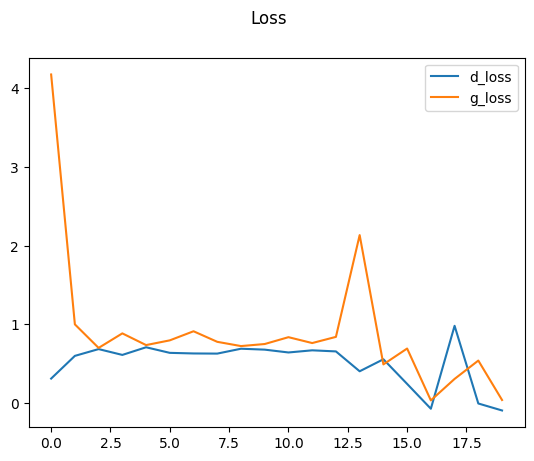

In [79]:
# Review Performance

plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

### Test Out the Generator

In [87]:
# Generate Images

generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

ValueError: ignored

In [88]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 350ms/step


In [89]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


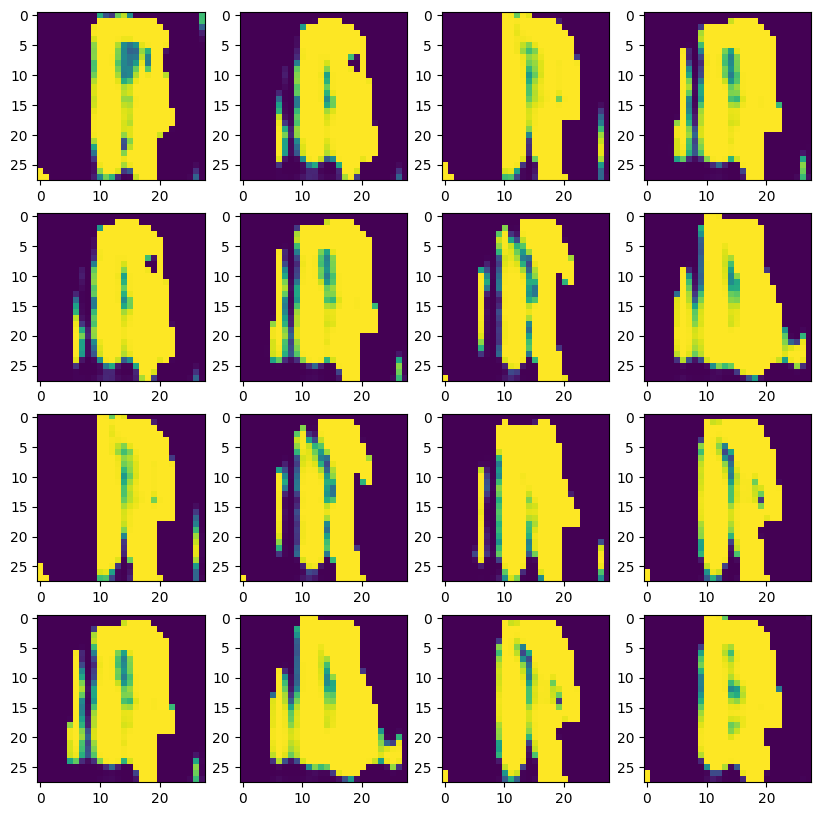

In [90]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [91]:
# Save the Model

generator.save('generator.h5')
discriminator.save('discriminator.h5')